```
```

### pykrx 를 이용한 주식시세 가져오기, seaborn 으로 챠트 그리기 ###
---------------------------------------------------

In [2]:
!pip install pykrx
!pip install matplotlib
!pip install ta
!pip install seaborn

  Using cached pykrx-1.0.40-py3-none-any.whl (125 kB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Using cached DateTime-5.0-py3-none-any.whl (52 kB)
  Using cached numpy-1.24.1-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached zope.interface-5.5.2-cp311-cp311-win_amd64.whl (211 kB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Using cached wrapt-1.14.1.tar.gz (50 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached charset_normalizer-3.0.1-cp311-cp311-win_amd64.whl (96 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.14-py2.py3-none-any.whl (140 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Running setup.py install for wrapt: started
  Running setup.py install 

  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.6.3-cp311-cp311-win_amd64.whl (7.2 MB)
  Using cached contourpy-1.0.7-cp311-cp311-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached Pillow-9.4.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached ta-0.10.2.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for ta: started
  Running setup.py install for ta: finished with status 'done'


  DEPRECATION: ta is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip show pykrx
print('\n')
!pip show matplotlib
print('\n')
!pip show ta
print('\n')
!pip show seaborn

Name: pykrx
Version: 1.0.40
Summary: KRX data scraping
Home-page: https://github.com/sharebook-kr/pykrx
Author: Brayden Jo, Jonghun Yoo
Author-email: brayden.jo@outlook.com, jonghun.yoo@outlook.com, pystock@outlook.com
License: MIT
Location: C:\Python311\Lib\site-packages
Requires: datetime, deprecated, numpy, pandas, requests, xlrd
Required-by: 


Name: matplotlib
Version: 3.6.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Python311\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn


Name: ta


Version: 0.10.2
Summary: Technical Analysis Library in Python
Home-page: https://github.com/bukosabino/ta
Author: Dario Lopez Padial (Bukosabino)
Author-email: Bukosabino@gmail.com
License: The MIT License (MIT)
Location: C:\Python311\Lib\site-packages
Requires: numpy, pa

* krx API 설명
```
https://github.com/sharebook-kr/pykrx
```

In [1]:
from  pykrx import stock
import matplotlib.pyplot as plt
import pandas   as pd
from datetime import datetime
import ta
import seaborn as sns

In [2]:
# matplotlib 에서 한글이 깨진다. 한글폰트 세팅이 필요함
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = r"C:\Windows\Fonts\H2GTRM.TTF"
# font_path = r"C:\Users\swkao\AppData\Local\Microsoft\Windows\Fonts\D2CodingBold-Ver1.3.2-20180524-ligature.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

>> 종목 리스트 가져오기

In [3]:
tickers = []
for ticker in stock.get_market_ticker_list(market='ALL'):
    tickers.append((ticker,stock.get_market_ticker_name(ticker)))
target_tickers = ["073560","010780","011210",'065680','161000']
tickers_ = list(filter(lambda x: x[0] in target_tickers,tickers))

In [2]:
tickers = stock.get_market_ticker_list(market='ALL')
tickers.head(5)

AttributeError: 'list' object has no attribute 'head'

In [9]:
tickers_

[('010780', '아이에스동서'),
 ('161000', '애경케미칼'),
 ('073560', '우리손에프앤지'),
 ('065680', '우주일렉트로'),
 ('011210', '현대위아')]

* Technical Analysis Library in Python
```
https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html
```

<AxesSubplot: title={'center': '삼성전자'}, xlabel='날짜', ylabel='종가'>

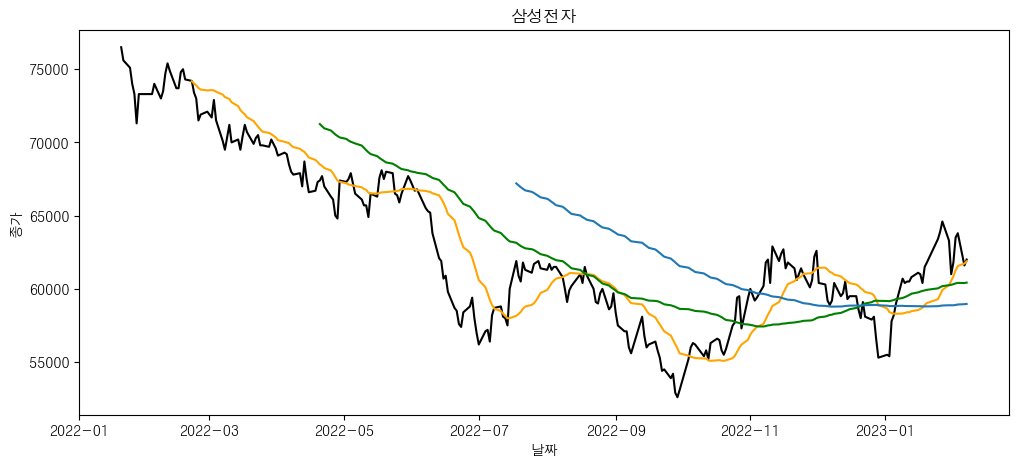

In [13]:
df = stock.get_market_ohlcv("20220120",  "20230207", '005930')   # 한종목만 나오는 대신 일자구간을 지정
# df = stock.get_market_ohlcv("20200810", "20201212", "005930", "m")  # d는 일자, m은 월, y는 연도
df['MA20']=ta.trend.SMAIndicator(close=df["종가"],window=20).sma_indicator()
df['MA60']=ta.trend.SMAIndicator(close=df["종가"],window=60).sma_indicator()
df['MA120']=ta.trend.SMAIndicator(close=df["종가"],window=120).sma_indicator()
df['Disparity60'] = df['종가'] / df['MA60'] * 100
df['Disparity120'] = df['종가'] / df['MA120'] * 100
df.tail(10)

plt.figure(figsize=(12,5))
# plt.xticks(rotation=60)
sns.lineplot(x="날짜", y="종가", data=df,color='black').set_title('삼성전자')
sns.lineplot(x="날짜", y="MA20", data=df,color='orange')
sns.lineplot(x="날짜", y="MA60", data=df,color='green')
sns.lineplot(x="날짜", y="MA120", data=df)

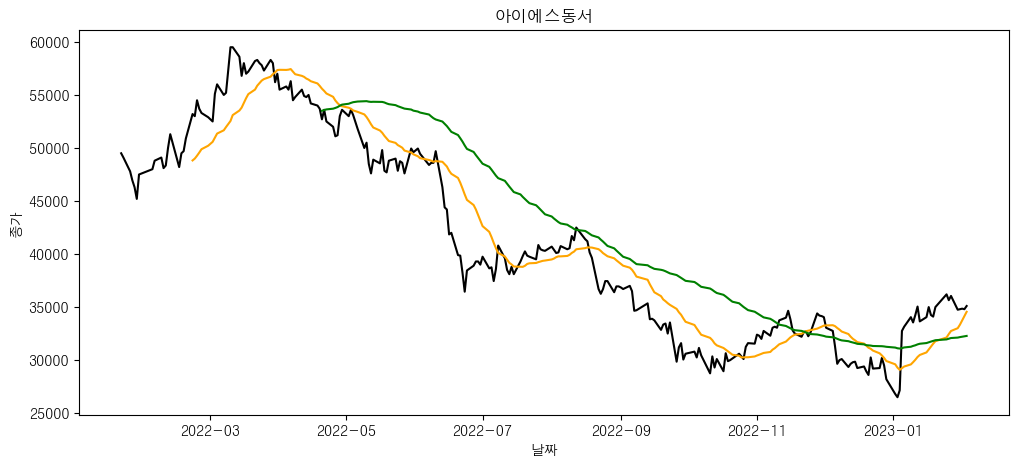

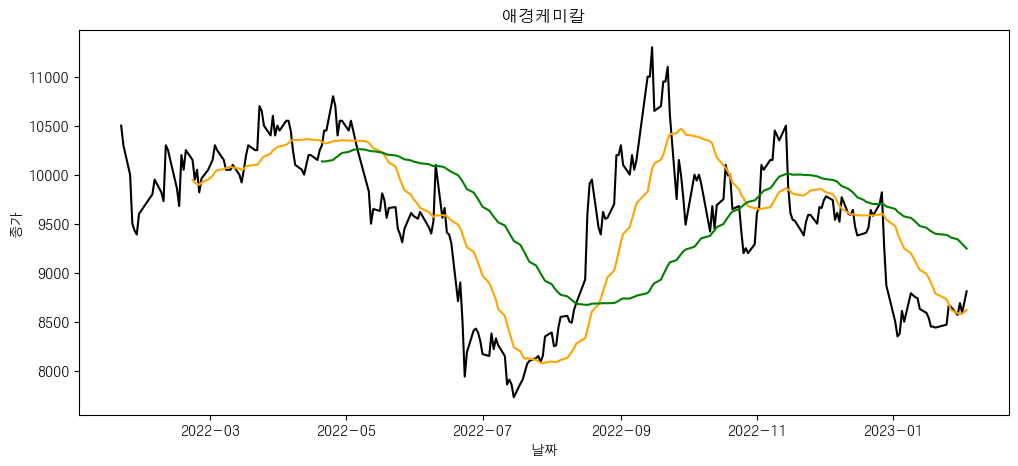

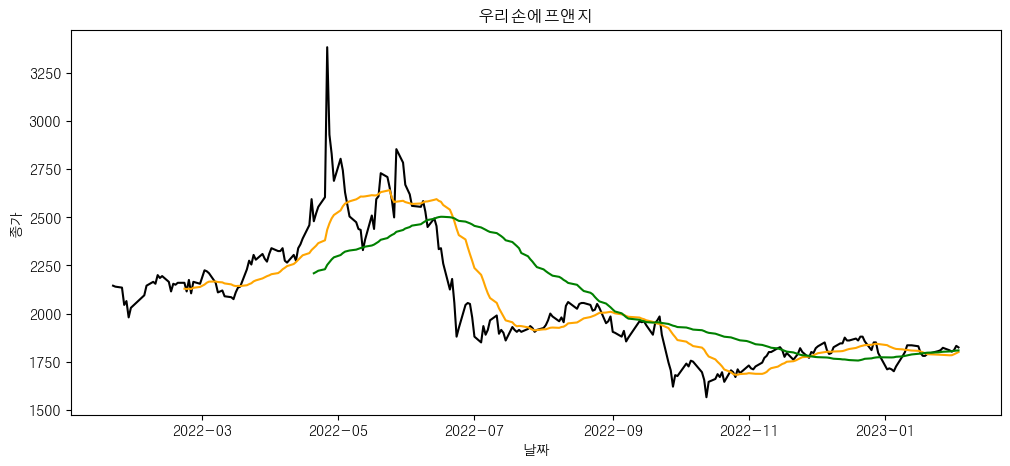

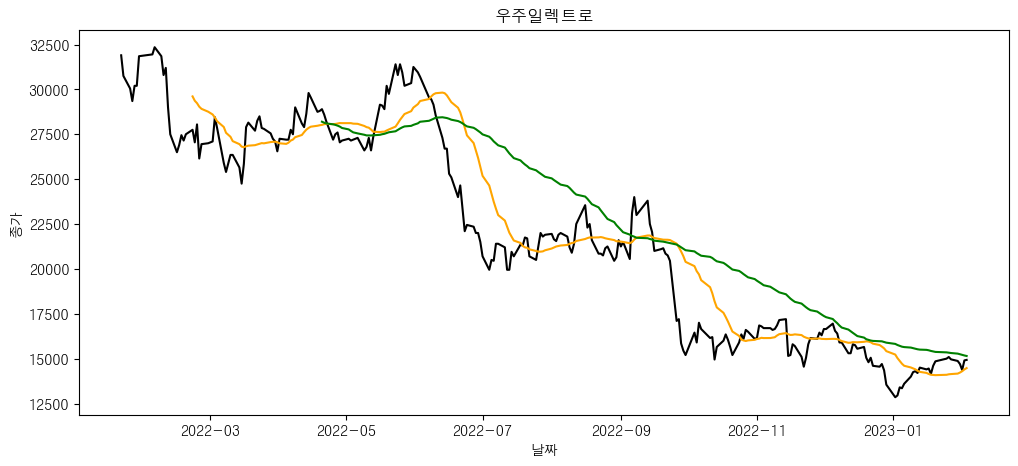

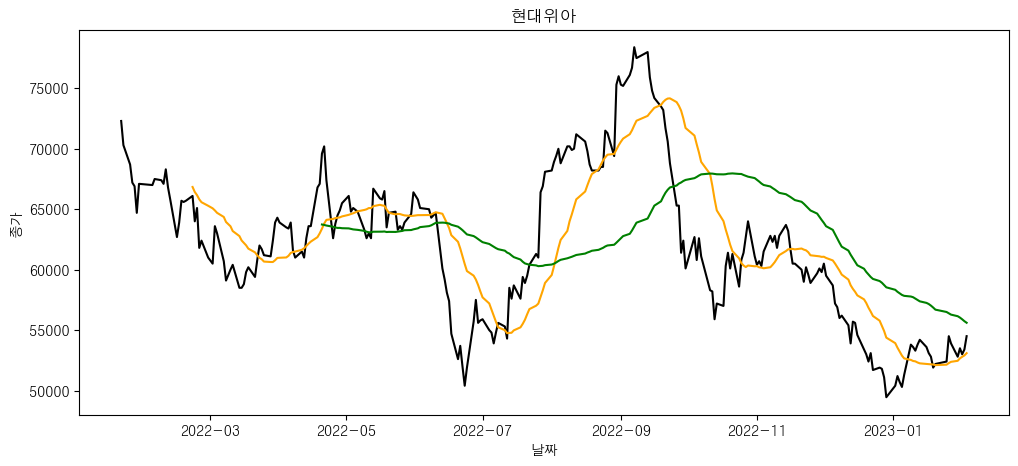

In [28]:
for t in tickers_ :
    df = stock.get_market_ohlcv("20220120",  "20230203", t[0])   # 한종목만 나오는 대신 일자구간을 지정
    # df = stock.get_market_ohlcv("20200810", "20201212", "005930", "m")  # d는 일자, m은 월, y는 연도
    df['MA20']=ta.trend.SMAIndicator(close=df["종가"],window=20).sma_indicator()
    df['MA60']=ta.trend.SMAIndicator(close=df["종가"],window=60).sma_indicator()
    df['MA120']=ta.trend.SMAIndicator(close=df["종가"],window=120).sma_indicator()
    df['Disparity60'] = df['종가'] / df['MA60'] * 100
    df['Disparity120'] = df['종가'] / df['MA120'] * 100

    plt.figure(figsize=(12,5))
    # plt.xticks(rotation=60)
    sns.lineplot(x="날짜", y="종가", data=df,color='black').set_title(t[1])
    sns.lineplot(x="날짜", y="MA20", data=df,color='orange')
    sns.lineplot(x="날짜", y="MA60", data=df,color='green')



### 이하 참고###
-----------------

In [37]:
#[참고] 시스템에 설치된 폰트 리스트 보기
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'H2GTRM' in font]

['HYGothic-Medium']

<AxesSubplot: xlabel='날짜', ylabel='종가'>

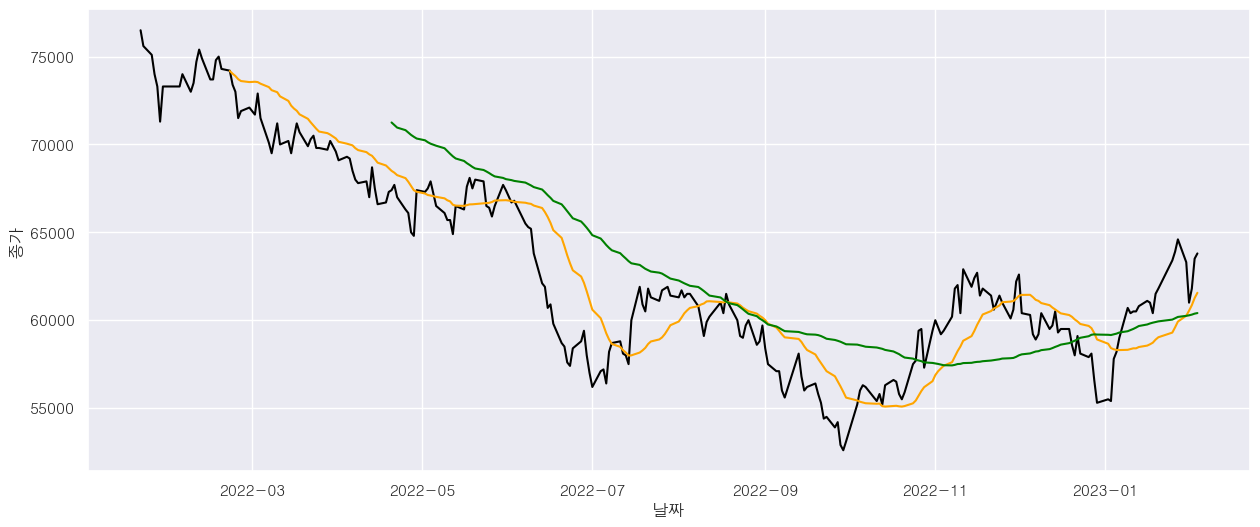

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
# plt.xticks(rotation=60)
# sns.pointplot(x="연도 (년)", y="추계인구(명)", data=df)
sns.lineplot(x="날짜", y="종가", data=df,color='black')
sns.lineplot(x="날짜", y="MA20", data=df,color='orange')
sns.lineplot(x="날짜", y="MA60", data=df,color='green')

<Figure size 1500x600 with 0 Axes>

([<matplotlib.axis.XTick at 0x1581c257850>,
 [Text(0, 0, '01.20'),
  Text(1, 0, '01.21'),
  Text(2, 0, '01.24'),
  Text(3, 0, '01.25'),
  Text(4, 0, '01.26'),
  Text(5, 0, '01.27'),
  Text(6, 0, '01.28'),
  Text(7, 0, '02.03'),
  Text(8, 0, '02.04'),
  Text(9, 0, '02.07'),
  Text(10, 0, '02.08'),
  Text(11, 0, '02.09'),
  Text(12, 0, '02.10'),
  Text(13, 0, '02.11'),
  Text(14, 0, '02.14'),
  Text(15, 0, '02.15'),
  Text(16, 0, '02.16'),
  Text(17, 0, '02.17'),
  Text(18, 0, '02.18'),
  Text(19, 0, '02.21'),
  Text(20, 0, '02.22'),
  Text(21, 0, '02.23'),
  Text(22, 0, '02.24'),
  Text(23, 0, '02.25'),
  Text(24, 0, '02.28'),
  Text(25, 0, '03.02'),
  Text(26, 0, '03.03'),
  Text(27, 0, '03.04'),
  Text(28, 0, '03.07'),
  Text(29, 0, '03.08'),
  Text(30, 0, '03.10'),
  Text(31, 0, '03.11'),
  Text(32, 0, '03.14'),
  Text(33, 0, '03.15'),
  Text(34, 0, '03.16'),
  Text(35, 0, '03.17'),
  Text(36, 0, '03.18'),
  Text(37, 0, '03.21'),
  Text(38, 0, '03.22'),
  Text(39, 0, '03.23'),
  Text

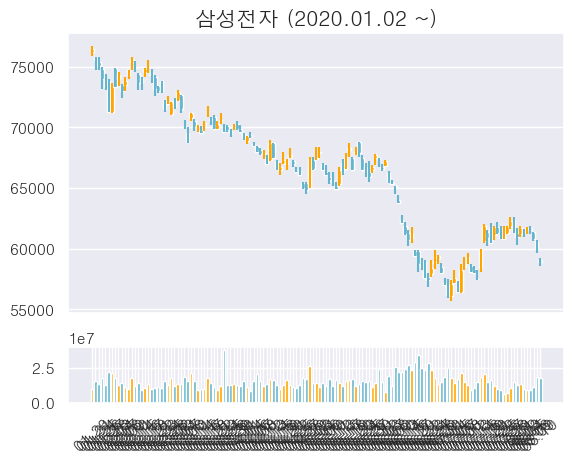

In [44]:
import matplotlib.pyplot as plt
import matplotlib
from  matplotlib import gridspec

# matplotlib.rcParams['font.family'] = "D2Coding"
matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.size'] = 12

plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(nrows=2, ncols=1,     # 커다란 판을 위 아래 2개로 구획한다.
                       height_ratios=[5, 1]) # 각 구획의 높이 비율을 5:1로 한다.
plt.subplots_adjust(wspace = 0, hspace = 0)  # 구획(subplot) 간의 간격을 없앤다.
plt.show()

x = list(map(lambda x: x.strftime('%m.%d'), df.index))
cmap = list(map(lambda x: 'orange' if x >0 else 'c', df['등락률']))

plt.subplot(gs[0])                           # 1번 구획을 불러들린다.
plt.title("삼성전자 (2020.01.02 ~)", fontsize=15)
plt.bar(x, height=df['종가']-df['시가'], bottom=df['시가'], width=1, color=cmap)
plt.vlines(x, df['저가'], df['고가'], colors=cmap)
plt.xticks([])

plt.subplot(gs[1])                           # 2번 구획을 불러들린다.
plt.bar(x, df['거래량'], width=0.8, color=cmap)
plt.xticks(range(0, len(x)), x, rotation=40)


In [9]:
df = stock.get_market_ohlcv("20220701")   #모든종목이 나오는 대신 특정일자 데이터만 
df.head(5)

,시가,고가,저가,종가,거래량,거래대금,등락률
티커,,,,,,,
095570,6350,6590,6260,6450,95812,610737150,0.00
006840,16450,16450,15750,15900,17322,276216550,-0.93
027410,4145,4205,4100,4145,198954,825646235,0.00
282330,196000,199000,188000,193000,61097,11825791000,2.12
138930,6800,6890,6720,6820,866581,5902851250,1.64


* fdr 에서 종목리스트를 dataframe 으로 작성

In [37]:
df_krx = fdr.StockListing('KRX')  # KRX는 KOSPI,KOSDAQ,KONEX 모두 포함
df_krx = df_krx.loc[df_krx['Code'].str.isdigit(),['Code','Name','Market']]  #테이블로 로딩할 칼럼만 선택한다.

In [38]:
df_krx.head(5)

,Code,Name,Market
0,005930,삼성전자,KOSPI
1,373220,LG에너지솔루션,KOSPI
2,000660,SK하이닉스,KOSPI
3,207940,삼성바이오로직스,KOSPI
4,006400,삼성SDI,KOSPI


* 종목리스트를 DB 테이블에 insert

In [51]:
cur = conn.cursor()
cur.execute('delete from company_info')
for idx,row in df_krx.iterrows() :
    cur.execute( 'INSERT INTO company_info VALUES (?, ?, ?)',row)

conn.commit()

* 현DB에 적재된 일별가격테이블의 최종일자를 구한다.
* 최종일자 이후 일별가격만 테이블에 추가적재 하기 위함

In [61]:
try :
    cur.execute('select max(date) from daily_price')
    sdate = cur.fetchall()[0][0] if cur.fetchall()[0][0] is not None else '20220101'
    print(sdate)
except OperationalError as e:
    print(e)
    sdate = '20220101'

20220101


In [65]:
sdate=None
if sdate is None :
	sdate = '20220101'
cur.execute('delete from daily_price where date >= ?',(sdate,))
conn.commit()

count=0
for idx,row in df_krx.iterrows() :
  df = fdr.DataReader(row[0], sdate)
  if df.empty :
    continue
  df = df.dropna().reset_index()  # 데이터 중에 NaN 있음, 날짜칼럼을 인텍스칼럼-> 일반칼럼
  df['Code'] = row[0]
  alist = df.columns.to_list()
  alist.insert(1,'Code')
  df = df[alist[:-1]]
  df["Date"] = df["Date"].dt.strftime("%Y%m%d")
  for idx1,row1 in df.iterrows() :
    cur.execute( 'INSERT INTO daily_price VALUES (?, ?, ?, ?, ?, ?, ?, ?)',row1)
    conn.commit()
  count += 1
  print(f"[daily_price]  {count:,} upsert completed")

[daily_price]  1 upsert completed
[daily_price]  2 upsert completed
[daily_price]  3 upsert completed
[daily_price]  4 upsert completed
[daily_price]  5 upsert completed
[daily_price]  6 upsert completed
[daily_price]  7 upsert completed
[daily_price]  8 upsert completed
[daily_price]  9 upsert completed
[daily_price]  10 upsert completed
[daily_price]  11 upsert completed
[daily_price]  12 upsert completed
[daily_price]  13 upsert completed
[daily_price]  14 upsert completed
[daily_price]  15 upsert completed
[daily_price]  16 upsert completed
[daily_price]  17 upsert completed
[daily_price]  18 upsert completed
[daily_price]  19 upsert completed
[daily_price]  20 upsert completed
[daily_price]  21 upsert completed
[daily_price]  22 upsert completed
[daily_price]  23 upsert completed
[daily_price]  24 upsert completed
[daily_price]  25 upsert completed
[daily_price]  26 upsert completed
[daily_price]  27 upsert completed
[daily_price]  28 upsert completed
[daily_price]  29 upsert comp

In [66]:
conn.close()